<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%91%D0%B0%D0%B7%D0%B0_Cifar10_(accuracy%3D85_)_%D0%B8_Cifar100((accuracy%3D56_)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

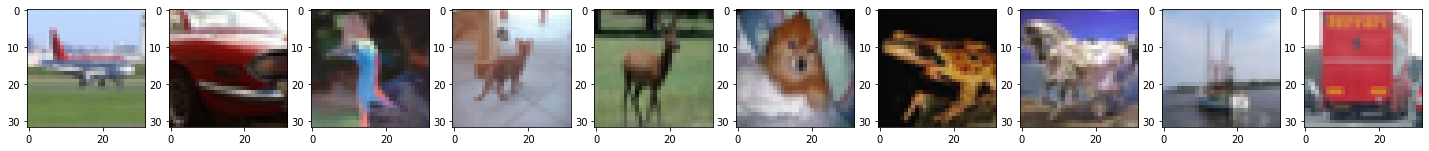

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

**Распознавание изображений из набора данных CIFAR-10,CIFAR-100 с помощью свёрточных нейронных сетей**
---


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.



In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Распознавание изображений из набора данных Cifar10




In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [ ]:
x_train10.shape

(50000, 32, 32, 3)

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

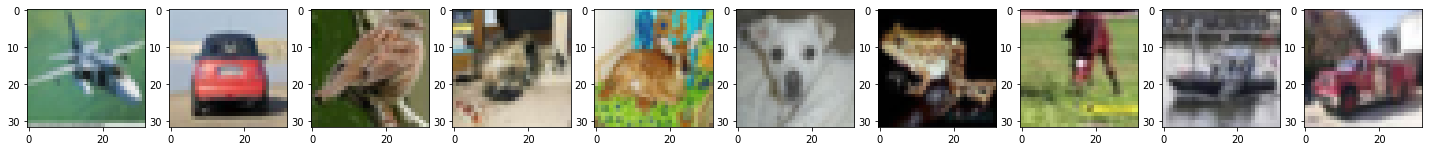

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**

*Разбор данного раздела:* https://youtu.be/66xTJhNnA2c?t=5866


In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

Epoch 1/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1412 - accuracy: 0.9522 - val_loss: 0.5951 - val_accuracy: 0.8510
Epoch 2/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1366 - accuracy: 0.9529 - val_loss: 0.6289 - val_accuracy: 0.8424
Epoch 3/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1384 - accuracy: 0.9530 - val_loss: 0.6050 - val_accuracy: 0.8467
Epoch 4/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1315 - accuracy: 0.9545 - val_loss: 0.6114 - val_accuracy: 0.8496
Epoch 5/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1278 - accuracy: 0.9569 - val_loss: 0.6436 - val_accuracy: 0.8472
Epoch 6/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1335 - accuracy: 0.9549 - val_loss: 0.5975 - val_accuracy: 0.8522
Epoch 7/70
391/391 [==============================] - 4s 9ms/step - loss: 0.1329 - accuracy: 0.9550 - val_loss: 0.5932 - val_accuracy: 0.8500
Epoch 

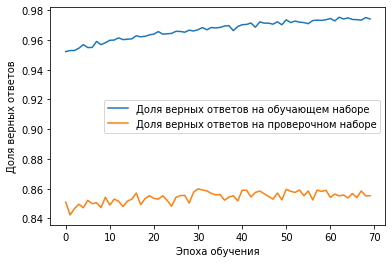

In [ ]:
#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Определение изображений из тестовой выборки**



In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

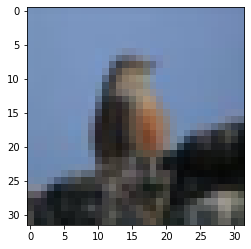

Выход сети:  [4.1539114e-09 1.6784738e-19 9.9999988e-01 1.3950812e-07 1.5754964e-08
 2.4868232e-09 2.6312341e-11 2.4982127e-10 1.0135396e-11 2.8564604e-15]
Распознанный образ:  2
Верный ответ:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Распознанный браз на картинке:  птица


In [ ]:
#Выбираем номер пример
n = np.random.randint(0,x_test10.shape[0])

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

**Определение фотографий из интернета**



In [ ]:
!unzip '/content/drive/My Drive/Базы/Занятие_3/Images.zip' #Извлечем файлы из архива

Archive:  /content/drive/My Drive/Базы/Занятие_3/Images.zip
   creating: Images/
  inflating: Images/0.jpg            
  inflating: Images/1.jpg            
  inflating: Images/2.jpg            
  inflating: Images/3.jpg            
  inflating: Images/4.jpg            
  inflating: Images/5.jpg            
  inflating: Images/6.jpg            
  inflating: Images/7.jpg            
  inflating: Images/8.jpg            
  inflating: Images/9.jpg            


In [ ]:
#Выводим для примера картинки по каждому классу

xTestReal10 = [] #Создаем x_test для загруженных картинок
yTestReal10 = [] #Создаем y_test для классов изображений

for i in range(10): #Проходим по классам от 0 до 9
  img_path = 'Images/' + str(i) + '.jpg' #Определяем имя изображения
  #Загружаем изображение, изменяя его размер на размер входного массива нейросети
  #Другими словами, подгоняем изображение к размеру картинок, на которых обучалась сеть

  xTestReal10.append(np.asarray(image.load_img(img_path, grayscale=False, target_size=(32, 32)))) #Добавляем изображение в выборку
  yTestReal10.append(i) #Добавляем в y номера классов

xTestReal10 = np.array(xTestReal10) #Преобразуем в Numpy array
yTestReal10 = np.array(yTestReal10) #Преобразуем в Numpy array

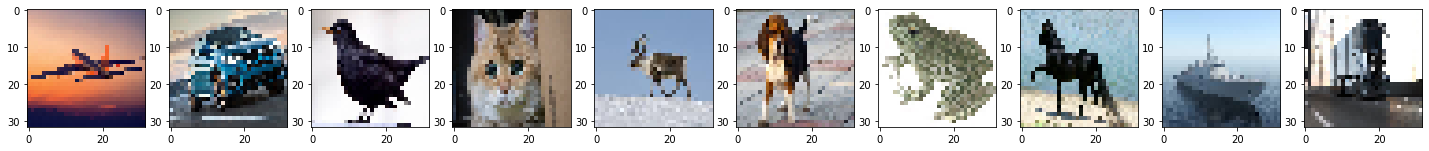

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  axs[i].imshow(Image.fromarray(xTestReal10[i]).convert('RGB')) #Конвертируем изображение в черно-белый формат и отображаем i-ым графиков

plt.show() #Показываем изображения

In [ ]:
xTestReal10.shape #Посмотрим на размер массива, чтобы убедиться, что все сделали правильно

(10, 32, 32, 3)

In [ ]:
prediction = model.predict(xTestReal10) #Классифицируем каждое изображение
for i in range(10): #Проходим по картинкам
  #Вводим результаты на экран
  print("Распознанный образ:", classes[np.argmax(prediction[i])])
  print('Верный ответ:', classes[yTestReal10[i]])
  print()

Распознанный образ: самолет
Верный ответ: самолет

Распознанный образ: грузовик
Верный ответ: автомобиль

Распознанный образ: птица
Верный ответ: птица

Распознанный образ: кот
Верный ответ: кот

Распознанный образ: корабль
Верный ответ: олень

Распознанный образ: собака
Верный ответ: собака

Распознанный образ: лягушка
Верный ответ: лягушка

Распознанный образ: лошадь
Верный ответ: лошадь

Распознанный образ: корабль
Верный ответ: корабль

Распознанный образ: грузовик
Верный ответ: грузовик



Вывводы: На тесте 10 изображений ошибся на 2. Точность на проверочной 85 %

#Распознавание изображений из набора данных Cifar100



In [ ]:
#Загружаем cifar100
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


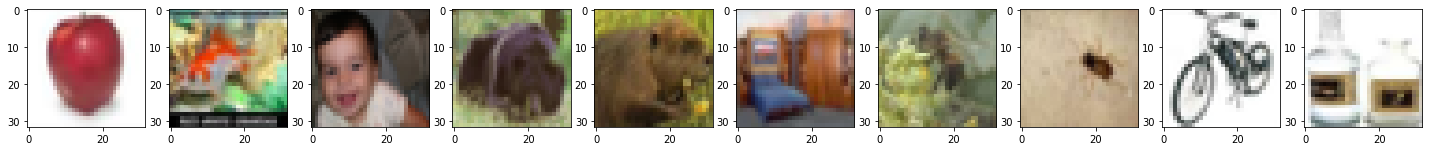

In [ ]:
#Выводим для примера картинки по первым 10 классам
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train100==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train100[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train100 = utils.to_categorical(y_train100, 100)
y_test100 = utils.to_categorical(y_test100, 100)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train100.shape)
print(x_test100.shape)
print(y_train100.shape)
print(y_test100.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


**Нейронная сеть**

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))


#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
#model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))


#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))


#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(100, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



Epoch 1/30
391/391 [==============================] - 7s 18ms/step - loss: 0.6652 - accuracy: 0.8321 - val_loss: 2.3014 - val_accuracy: 0.5674
Epoch 2/30
391/391 [==============================] - 7s 17ms/step - loss: 0.6355 - accuracy: 0.8394 - val_loss: 2.3603 - val_accuracy: 0.5615
Epoch 3/30
391/391 [==============================] - 7s 17ms/step - loss: 1.2418 - accuracy: 0.7089 - val_loss: 2.2706 - val_accuracy: 0.4670
Epoch 4/30
391/391 [==============================] - 7s 17ms/step - loss: 1.5976 - accuracy: 0.6384 - val_loss: 2.2464 - val_accuracy: 0.4804
Epoch 5/30
391/391 [==============================] - 7s 17ms/step - loss: 1.2392 - accuracy: 0.7009 - val_loss: 2.1645 - val_accuracy: 0.5515
Epoch 6/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9425 - accuracy: 0.7701 - val_loss: 2.2015 - val_accuracy: 0.5664
Epoch 7/30
391/391 [==============================] - 7s 17ms/step - loss: 0.7774 - accuracy: 0.8087 - val_loss: 2.2439 - val_accuracy: 0.5602

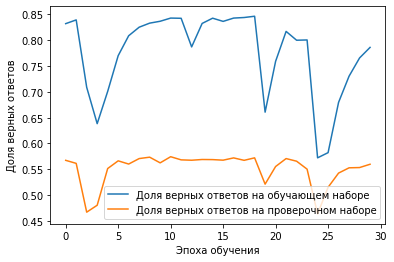

In [ ]:
#Обучаем сеть на данных cifar100
history = model.fit(x_train100, 
                    y_train100, 
                    batch_size=batch_size, 
                    epochs=30,
                    validation_data=(x_test100, y_test100),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       